# Part II - PROSPER LOAN DATA ANALYSIS
## by Idongesit Offiong


## Investigation Overview


> In this investigation, I focused on the features that determine the status of a loan. My major focus was on income range of the borrower, the original loan amount, the APR and the borrowers Rate.



## Dataset Overview

> The data consists of 113937 rows and 81 columns. Some of the columns with too many null values or inconsistencies were drop

In [30]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [31]:
# load in the dataset into a pandas dataframe
loan_data = pd.read_csv('prosperLoanData.csv')

In [32]:
## Data Wrangling to remove columns with too many null values

col = ['LoanFirstDefaultedCycleNumber','ScorexChangeAtTimeOfListing',
       'TotalProsperLoans','TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
       'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate','ProsperPrincipalBorrowed',
       'ProsperPrincipalOutstanding', 'CreditScoreRangeLower',
       'FirstRecordedCreditLine', 'CurrentCreditLines','OpenCreditLines', 'GroupKey',
       'BorrowerState','Occupation', 'EmploymentStatusDuration', 
       'EstimatedEffectiveYield','EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 
       'ProsperRating (Alpha)', 'ProsperScore', 'ClosedDate','CreditGrade','TotalProsperLoans',
       'TotalProsperPaymentsBilled', 'OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate', 
       'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed','ProsperPrincipalOutstanding',
       'ScorexChangeAtTimeOfListing','LoanFirstDefaultedCycleNumber','CreditScoreRangeLower','FirstRecordedCreditLine','CurrentCreditLines','OpenCreditLines',
       'GroupKey','BorrowerState','Occupation','EmploymentStatusDuration','EstimatedEffectiveYield',
       'EstimatedLoss','EstimatedReturn','ProsperRating (numeric)','ProsperRating (Alpha)','ProsperScore','ClosedDate','CreditGrade']

loan_data.drop(col, axis = 1, inplace = True)

In [33]:
col_2 = ['TotalCreditLinespast7years','InquiriesLast6Months','TotalInquiries',                       
'DelinquenciesLast7Years','PublicRecordsLast10Years',          
'PublicRecordsLast12Months','RevolvingCreditBalance','BankcardUtilization',                  
'AvailableBankcardCredit','TotalTrades','TradesNeverDelinquent (percentage)', 
'TradesOpenedLast6Months','DebtToIncomeRatio']

loan_data.drop(col_2, axis = 1, inplace = True)

In [34]:
col_3 = ['LP_ServiceFees','LP_CollectionFees','LP_GrossPrincipalLoss',
         'LP_NetPrincipalLoss','LP_NonPrincipalRecoverypayments',
         'Recommendations','InvestmentFromFriendsCount','InvestmentFromFriendsAmount',
         'ListingCategory (numeric)','ListingNumber','MemberKey',
         'PercentFunded','Investors','LoanNumber','LoanKey','MonthlyLoanPayment',
         'LenderYield','LoanOriginationDate','OpenRevolvingAccounts','ListingKey','DateCreditPulled']
loan_data.drop(col_3, axis = 1, inplace = True)

## (Visualization 1)

> Most of the loan in the dataset are current loan. However, a significant number are either completed, chargedoff or defaulted.

Text(0,0.5,'Counts')

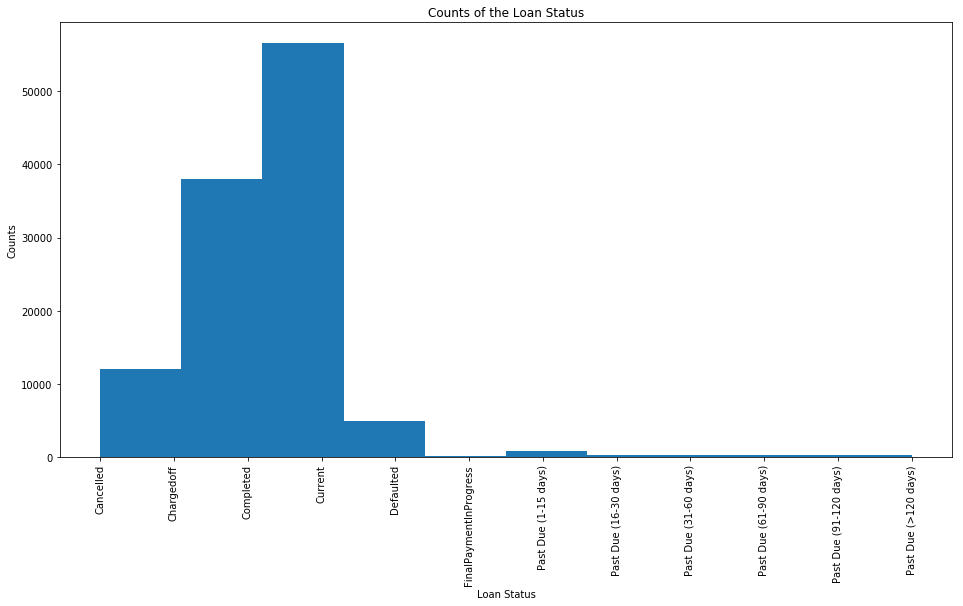

In [35]:
# let's start by looking at the distribution of the Loan status

number_cat = loan_data['LoanStatus'].value_counts()
plt.figure(figsize = (16,8))
plt.hist(x = 'LoanStatus', data = loan_data)
plt.xticks(rotation = 90)
plt.title('Counts of the Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Counts')

## (Visualization 2)

> Here, it is very clear how BorrowerRate is affecting the status of the loan. Completed loans, current loan and loans at the final repayment stage have lower BorrowerRate compare to loans that are charged off, past due etc 

Text(0.5,1,'A Plot of BorrowerRate Against Loan Status')

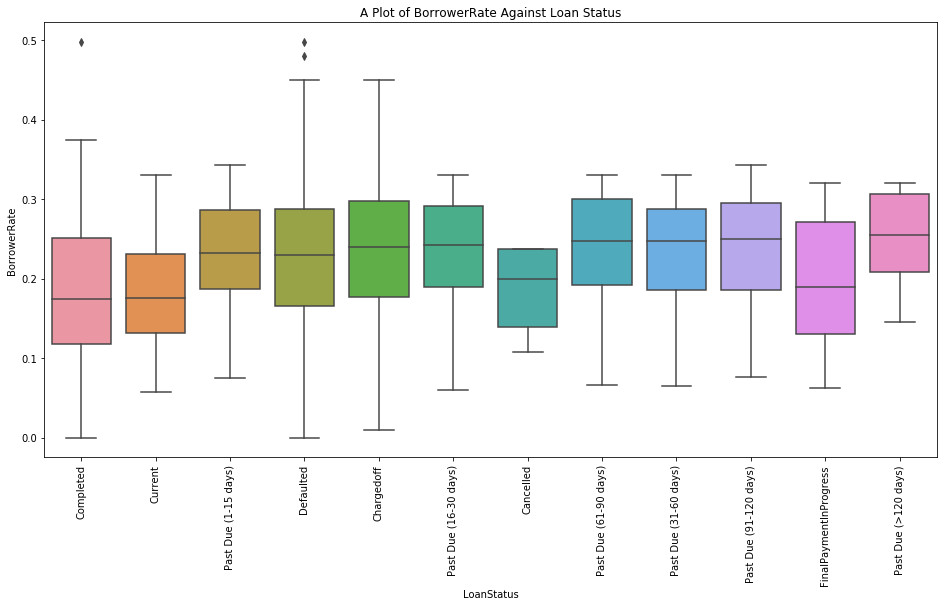

In [36]:
# Let's check if the BorrowerRate has effect on loan status
plt.figure(figsize=[16,8])
sb.boxplot(x = 'LoanStatus',y = 'BorrowerRate', data = loan_data)
plt.xticks(rotation = 90)
plt.title('A Plot of BorrowerRate Against Loan Status')


## (Visualization 3)

> The OriginalLoanAmount does not have any effect on the Loan Status. This is surprising as one will think that a higher loan amount disbursed to a client will affect his/her repayment, especially when the client falls under low income earners.

Text(0.5,1,'Loan Amount Vs Loan Status')

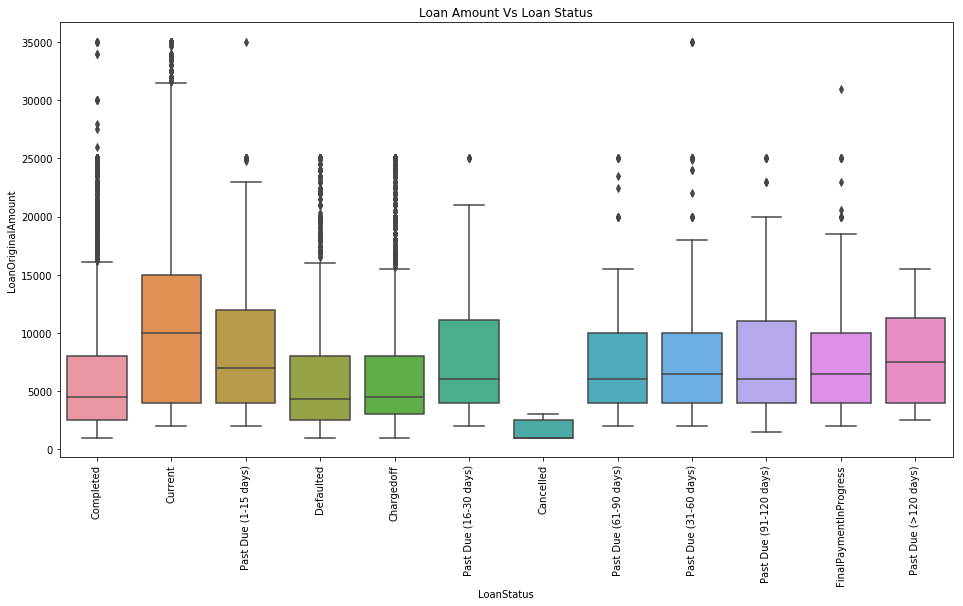

In [37]:
# let's check how loan amount affect the loan status?
plt.figure(figsize=[16,8])
sb.boxplot(x = 'LoanStatus', y = 'LoanOriginalAmount', data = loan_data)
plt.xticks(rotation = 90)
plt.title('Loan Amount Vs Loan Status')

## (Visualization 4)

> In each category of the loan status, the lower BorrowerAPR is for the home owner while higher ARP is for those without homes.

Text(0.5,1,'LoanStatus Vs BorrowerAPR Vs IsBorrowerHomeowner ')

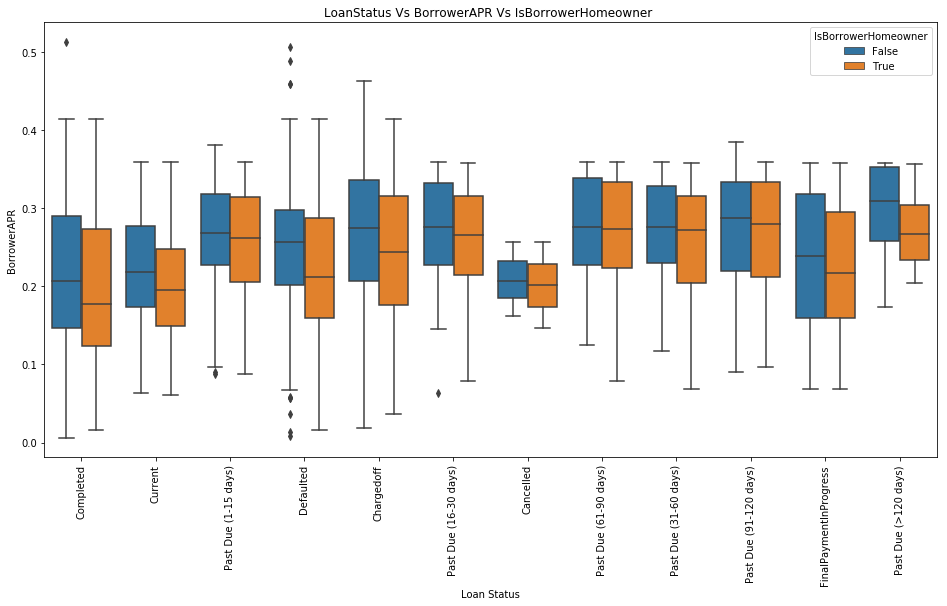

In [38]:
# LoanStatus Vs BorrowerAPR VS IsBorrowerHomeowner
plt.figure(figsize=[16,8])
sb.boxplot(x="LoanStatus", y="BorrowerAPR", hue = 'IsBorrowerHomeowner', data=loan_data);
plt.xticks(rotation = 90)
plt.xlabel('Loan Status')
plt.ylabel('BorrowerAPR')
plt.title('LoanStatus Vs BorrowerAPR Vs IsBorrowerHomeowner ')

# (Visualization 5)

#### It is very clear that the original loan amout increases with the term of the loan and as expected, the highest loan amount was disbursed to the employed. The borrowerAPR on the other hand, was slightly higher for a short term loan compare to the long term loan.

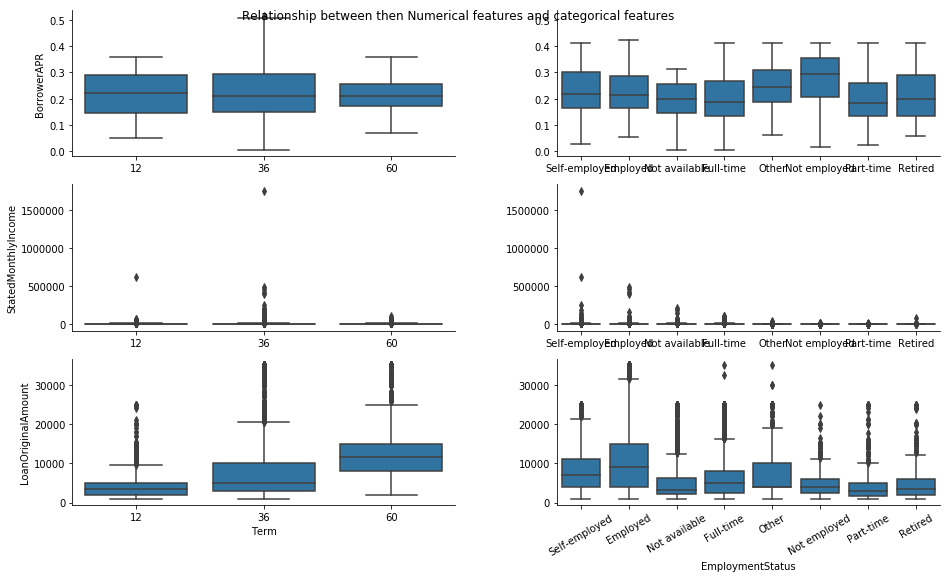

In [39]:
# plot matrix of numeric features against categorical features.

def box_func(x, y, **kwargs):
    """ This function will create a pair grid box plot """
    color = sb.color_palette()[0]
    sb.boxplot(x, y, color = color)

plt.figure(figsize = [14, 8])
g = sb.PairGrid(data = loan_data, y_vars = ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount'], 
                x_vars = ['Term','EmploymentStatus'], size = 3, aspect = 1.5)
g.map(box_func);
plt.xticks(rotation=30)
plt.tight_layout()
g.fig.suptitle('Relationship between then Numerical features and categorical features')
g.fig.set_size_inches(14, 8)
plt.show()

# (Visualization 6)

#### As the credit score increases, the borrower Rate decreases


Text(0.5,1,'Loan Amount vs Credit Score Vs Borrower Rate')

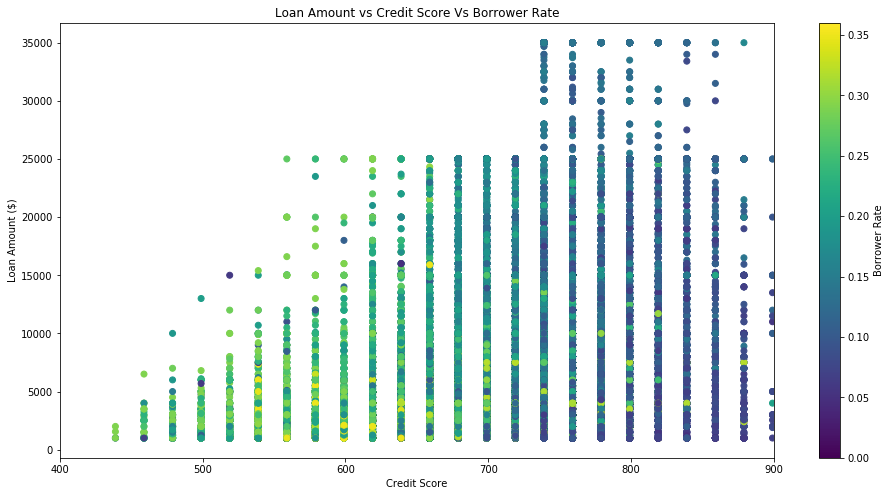

In [41]:
#Scatter plot using original LoanOriginalAmount
plt.figure(figsize=[16,8])
plt.scatter(data=loan_data, x='CreditScoreRangeUpper', y='LoanOriginalAmount', c='BorrowerRate');
plt.colorbar(label='Borrower Rate')
plt.xlim(400, 900);
plt.ylabel('Loan Amount ($)')
plt.xlabel('Credit Score')
plt.title('Loan Amount vs Credit Score Vs Borrower Rate')

In [12]:
# Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

SyntaxError: invalid syntax (<ipython-input-12-65c8d8b2dee8>, line 2)

## Finding summary

>After the analysis of the prosper loan dataset, the following pattern were observed:

>1.Most of the loans in the dataset are current loans some are completed.

>2.Most loans were taken for a perios of 36 months(3 years).

>3.Loans with higher APR tends to be past dues, charged off whereas, completed loans have lower APR.

>4.There is a strong positive correlation between BorrowerAPR and BorrowerRate.

>5.The loan original amount does not affect the loan status.

>6.The credit score and the Borrower rate are negatively correlated


In [ ]:
!jupyter nbconvert Part_II_slide_deck_complete.ipynb --to slides --post serve  --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_complete.ipynb to slides
[NbConvertApp] Writing 643220 bytes to Part_II_slide_deck_complete.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_complete.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
